1. Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.


4.242640687119285
3.1622776601683795
7.0710678118654755
3.7416573867739413
7.483314773547883
8.12403840463596


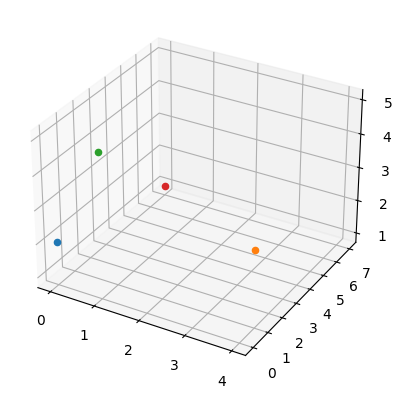

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

a = np.array([0, 0, 2])
b = np.array([4, 1, 3])
c = np.array([1, 0, 5])
d = np.array([0, 7, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

points = [a, b, c, d]

for i in points:
    ax.scatter(*i)

print(np.linalg.norm(a - b))
print(np.linalg.norm(a - c))
print(np.linalg.norm(a - d))
print(np.linalg.norm(b - c))
print(np.linalg.norm(b - d))
print(np.linalg.norm(c - d))

plt.show()


2. Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания
необходимо использовать функцию arange.


In [ ]:
x = np.zeros((5, 5))
x += np.arange(5)
print(x)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


3. Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты.

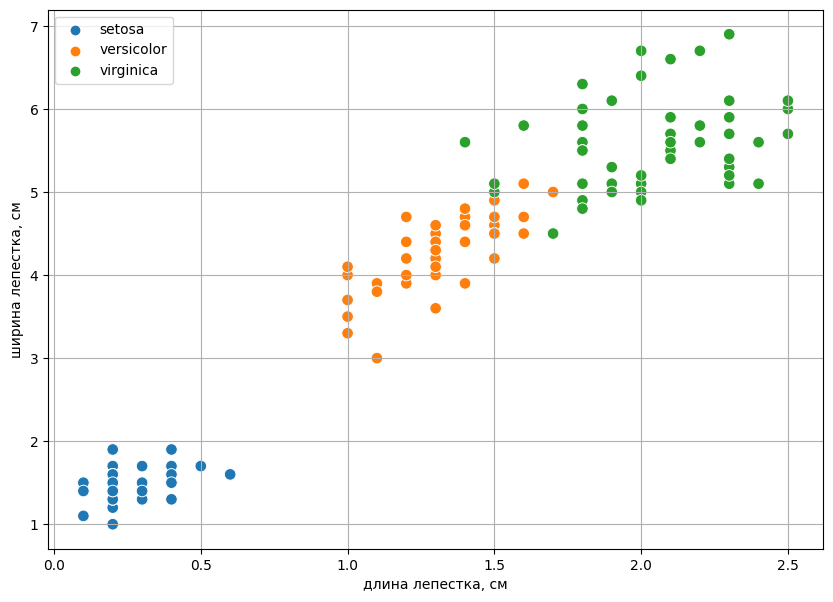

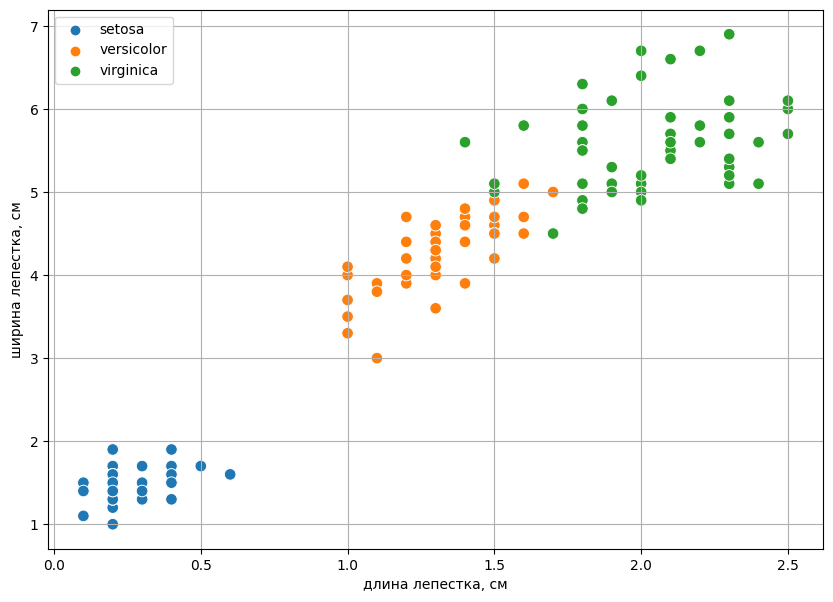

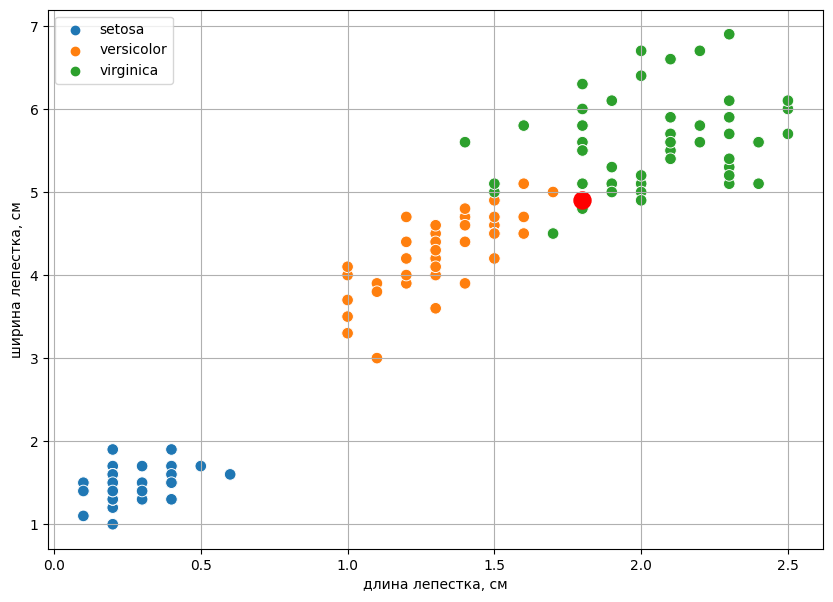

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

iris = sns.load_dataset('iris')

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size=0.15
)

model_1 = KNeighborsClassifier(n_neighbors=1)
model_1.fit(X_train, y_train)
model_5 = KNeighborsClassifier(n_neighbors=5)
model_5.fit(X_train, y_train)
model_10 = KNeighborsClassifier(n_neighbors=10)
model_10.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)
y_pred_5 = model_5.predict(X_test)
y_pred_10 = model_10.predict(X_test)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('длина лепестка, см')
plt.ylabel('ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred_1[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('длина лепестка, см')
plt.ylabel('ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred_5[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('длина лепестка, см')
plt.ylabel('ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred_10[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)


4. Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.

In [ ]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{'кот': 8, 'собака': 5},
             {'кот': 3, 'курица': 3},
             {'курица': 1, 'собака': 9},
             {'кот': 4, 'курица': 7}]
dictectorizer = DictVectorizer(sparse=False)
features = dictectorizer.fit_transform(data_dict)
features


array([[8., 0., 5.],
       [3., 3., 0.],
       [0., 1., 9.],
       [4., 7., 0.]])